In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np


In [68]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n \
battered away till he hadn't a pound \n \
his father he died and made him a man again \n \
left a farm with ten acres of ground \n \
he gave a grand party for friends a relations \n \
who did not forget him when come to the will \n \
and if you'll but listen I'll make you're eyes glisten \n \
of rows and ructions at Lanigan's Ball \n \
Myself to be sure got free invitaions \n \
for all the nice boys and girls I did ask \n \
in less than 10 minutes the friends and relations \n \
were dancing as merry as bee 'round a cask \n \
There was lashing of punch and wine for the ladies \n \
potatoes and cakes there was bacon a tay \n \
there were the O'Shaughnessys, Murphys, Walshes, O'Gradys \n \
courtin' the girls and dancing away \n \
they were doing all kinds of nonsensical polkas \n \
all 'round the room in a whirly gig\n \
but Julia and I soon banished their nonsense \n \
and tipped them a twist of a real Irish jig \n \
Oh how that girl got mad on me \n \
and danced till you'd think the ceilings would fall \n \
for I spent three weeks at Brook's academy \n \
learning to dance for Lanigan's Ball CHORUS \n \
The boys were all merry the girls were all hearty \n \
dancing away in couples and groups \n \
till an accident happened young Terrance McCarthy \n \
put his right leg through Miss Finerty's hoops \n \
The creature she fainted and cried 'melia murder' \n \
cried for her brothers and gathered them all \n \
Carmody swore that he'd go no further \n \
till he'd have satisfaction at Lanigan's Ball \n \
In the midst of the row Miss Kerrigan fainted \n \
her cheeks at the same time as red as a rose \n \
some of the boys decreed she was painted \n \
she took a wee drop too much I suppose \n \
Her sweetheart Ned Morgan all powerful and able \n \
when he saw his fair colleen stretched out by the wall \n \
he tore the left leg from under the table \n \
and smashed all the dishes at Lanigan's Ball CHORUS"

#!wget --no-check-certificate \
#https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \ -o /irish-lyrics-eof.txt


data2 = open('irish-lyrics-eof.txt').read()
corpus = data2.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))

#creating predcitors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [70]:
#print([corpus[0]])
#t=tokenizer.texts_to_sequences([corpus[0]])[0]
#[len(x) for x in input_sequences]
#x=np.array([[1,2,3,4,5,6],[6,7,8,9,10,11]])
#x[:,-1]
#max_sequence_len
xs.shape

(12038, 15)

In [71]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [72]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = 'accuracy')
history = model.fit(xs, ys, epochs=100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 4s 11ms/step - loss: 6.6381 - accuracy: 0.0748
Epoch 2/100
377/377 [==============================] - 4s 11ms/step - loss: 5.7546 - accuracy: 0.1153
Epoch 3/100
377/377 [==============================] - 5s 12ms/step - loss: 4.8352 - accuracy: 0.1651
Epoch 4/100
377/377 [==============================] - 4s 11ms/step - loss: 3.9077 - accuracy: 0.2382
Epoch 5/100
377/377 [==============================] - 4s 11ms/step - loss: 3.0933 - accuracy: 0.3349
Epoch 6/100
377/377 [==============================] - 4s 11ms/step - loss: 2.4412 - accuracy: 0.4450
Epoch 7/100
377/377 [==============================] - 4s 11ms/step - loss: 1.9601 - accuracy: 0.5354
Epoch 8/100
377/377 [==============================] - 4s 11ms/step - loss: 1.6202 - accuracy: 0.6158
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 1.3649 - accuracy: 0.6698
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 1.239

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.show()

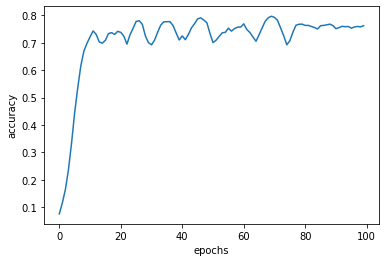

In [73]:
plot_graphs(history, "accuracy")

In [74]:
seed_text = "Laurance went to dublin"
next_words = 20

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = np.array(pad_sequences([token_list], maxlen=max_sequence_len-1, padding = 'pre'))
  predicted = model.predict_classes(token_list, verbose =0)
  output_word=""
  for word, index in tokenizer.word_index.items():
    if index==predicted:
      output_word = word
      break
  seed_text+=" " + output_word

print(seed_text)


Laurance went to dublin town on all of her mothers always one call bell of gladness next city i did slaughter gone away eyes


In [61]:
for word, index in tokenizer.word_index.items():
  print(word, index)

the 1
and 2
a 3
of 4
all 5
for 6
in 7
he 8
at 9
were 10
till 11
lanigan's 12
ball 13
i 14
as 15
away 16
his 17
to 18
boys 19
girls 20
dancing 21
there 22
was 23
she 24
her 25
him 26
left 27
friends 28
relations 29
did 30
when 31
but 32
got 33
merry 34
'round 35
them 36
that 37
chorus 38
leg 39
miss 40
fainted 41
cried 42
he'd 43
town 44
athy 45
one 46
jeremy 47
lanigan 48
battered 49
hadn't 50
pound 51
father 52
died 53
made 54
man 55
again 56
farm 57
with 58
ten 59
acres 60
ground 61
gave 62
grand 63
party 64
who 65
not 66
forget 67
come 68
will 69
if 70
you'll 71
listen 72
i'll 73
make 74
you're 75
eyes 76
glisten 77
rows 78
ructions 79
myself 80
be 81
sure 82
free 83
invitaions 84
nice 85
ask 86
less 87
than 88
10 89
minutes 90
bee 91
cask 92
lashing 93
punch 94
wine 95
ladies 96
potatoes 97
cakes 98
bacon 99
tay 100
o'shaughnessys 101
murphys 102
walshes 103
o'gradys 104
courtin' 105
they 106
doing 107
kinds 108
nonsensical 109
polkas 110
room 111
whirly 112
gig 113
julia 114
soon 